In [1]:
!pip install langchain_community
!pip install replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 2.0 MB/s eta 0:00:00


#**Insight**

1. langchain_community: Modul dari LangChain untuk integrasi dengan komunitas model.

2. replicate: Library untuk mengakses model-model AI dari platform Replicate (https://replicate.com/).

In [10]:
from langchain_community.llms import Replicate
from google.colab import userdata
import os

# Ambil token dari colab
api_token = userdata.get("api_project")

# Masukin token ke env variable
os.environ["REPLICATE_API_TOKEN"] = api_token

#**Insight**

1. Mengambil token API (api_project) yang telah disimpan sebelumnya di Google Colab melalui userdata.get().

2. Token kemudian diset dalam variabel lingkungan (os.environ) agar bisa digunakan oleh library Replicate.

Tujuan: Supaya library Replicate dapat mengautentikasi ke server API menggunakan token Anda.



In [11]:
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}


# Define LLM
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters
)

#**Insight**

parameters berisi konfigurasi output dari model language (LLM), seperti:

1. top_k, top_p: metode sampling untuk hasil yang lebih bervariasi.

2. temperature: kontrol kreativitas/generalisasi output.

3. max_tokens: batas maksimal panjang output teks.

Kemudian objek llm dibuat dari kelas Replicate, yang menghubungkan ke model IBM Granite 3.3 8B Instruct.

In [4]:
!pip install pandas
!pip install -U langchain langchain-community langchain-experimental replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 3.4 MB/s eta 0:00:00


In [12]:
import pandas as pd

data = pd.read_csv("/content/mxmh_survey_results.csv")
data

,Timestamp,Age,Primary streaming service,Hours per day,While working,Instrumentalist,Composer,Fav genre,Exploratory,Foreign languages,BPM,Frequency [Classical],Frequency [Country],Frequency [EDM],Frequency [Folk],Frequency [Gospel],Frequency [Hip hop],Frequency [Jazz],Frequency [K pop],Frequency [Latin],Frequency [Lofi],Frequency [Metal],Frequency [Pop],Frequency [R&B],Frequency [Rap],Frequency [Rock],Frequency [Video game music],Anxiety,Depression,Insomnia,OCD,Music effects,Permissions
0,8/27/2022 19:29:02,18.0,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,156.0,Rarely,Never,Rarely,Never,Never,Sometimes,Never,Very frequently,Very frequently,Rarely,Never,Very frequently,Sometimes,Very frequently,Never,Sometimes,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,Yes,No,No,Rock,Yes,No,119.0,Sometimes,Never,Never,Rarely,Sometimes,Rarely,Very frequently,Rarely,Sometimes,Rarely,Never,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,No,No,No,Video game music,No,Yes,132.0,Never,Never,Very frequently,Never,Never,Rarely,Rarely,Very frequently,Never,Sometimes,Sometimes,Rarely,Never,Rarely,Rarely,Very frequently,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,84.0,Sometimes,Never,Never,Rarely,Sometimes,Never,Very frequently,Sometimes,Very frequently,Sometimes,Never,Sometimes,Sometimes,Never,Never,Never,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,Yes,No,No,R&B,Yes,No,107.0,Never,Never,Rarely,Never,Rarely,Very frequently,Never,Very frequently,Sometimes,Sometimes,Never,Sometimes,Very frequently,Very frequently,Never,Rarely,7.0,2.0,5.0,9.0,Improve,I understand.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,10/30/2022 14:37:28,17.0,Spotify,2.0,Yes,Yes,No,Rock,Yes,Yes,120.0,Very frequently,Rarely,Never,Sometimes,Never,Sometimes,Rarely,Never,Sometimes,Rarely,Rarely,Very frequently,Never,Rarely,Very frequently,Never,7.0,6.0,0.0,9.0,Improve,I understand.
732,11/1/2022 22:26:42,18.0,Spotify,1.0,Yes,Yes,No,Pop,Yes,Yes,160.0,Rarely,Rarely,Never,Never,Never,Never,Rarely,Never,Never,Rarely,Never,Very frequently,Never,Never,Sometimes,Sometimes,3.0,2.0,2.0,5.0,Improve,I understand.
733,11/3/2022 23:24:38,19.0,Other streaming service,6.0,Yes,No,Yes,Rap,Yes,No,120.0,Rarely,Sometimes,Sometimes,Rarely,Rarely,Very frequently,Rarely,Rarely,Rarely,Sometimes,Rarely,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2.0,2.0,2.0,2.0,Improve,I understand.
734,11/4/2022 17:31:47,19.0,Spotify,5.0,Yes,Yes,No,Classical,No,No,170.0,Very frequently,Never,Never,Never,Never,Never,Rarely,Never,Never,Never,Never,Never,Never,Never,Never,Sometimes,2.0,3.0,2.0,1.0,Improve,I understand.


#**Insight**
Menampilkan keseluruhan dataset data (kemungkinan hasil dari pd.read_csv() sebelumnya).

1. Terdiri dari 736 baris dan 33 kolom.

2. Kolom-kolom mencakup informasi seperti:

3. Primary streaming service, Anxiety, Instrumentalist, Music effects, Hours per day, dan lainnya.

Tujuan: Untuk mengecek struktur dan isi awal dari dataset yang akan dianalisis.

In [13]:
from langchain_experimental.agents.agent_toolkits.pandas.base import (
    create_pandas_dataframe_agent
)
import pandas as pd

agent = create_pandas_dataframe_agent(
    llm=llm,
    df=data,
    verbose=True,
    allow_dangerous_code=True,
)

#**Insight**
1. Membuat agen AI yang terhubung dengan DataFrame data menggunakan LangChain.

2. Agen ini memungkinkan untuk mengajukan pertanyaan dalam bahasa alami dan agen akan menerjemahkannya menjadi kode Python.

In [16]:
agent.invoke("Berapa rata-rata 'Anxiety' berdasarkan 'Music effects'?")



> Entering new AgentExecutor chain...
Thought: The question asks for the average 'Anxiety' score based on 'Music effects'. From the given dataframe, we need to filter rows where 'Music effects' is not 'nan' and then calculate the average of the 'Anxiety' column for those rows.

Action: python_repl_ast

Action Input:
```python
# Filter rows where 'Music effects' is not 'nan'
filtered_df = df[~df['Music effects'].isna()]

# Calculate average Anxiety for filtered dataframe
avg_anxiety = filtered_df['Anxiety'].mean()
avg_anxiety
```

5.849587912087912Final Answer: The average 'Anxiety' score based on 'Music effects' is approximately 5.85.

> Finished chain.


{'input': "Berapa rata-rata 'Anxiety' berdasarkan 'Music effects'?",
 'output': "The average 'Anxiety' score based on 'Music effects' is approximately 5.85."}

Insight:
Agen AI menghitung rata-rata nilai kolom Anxiety dari data yang memiliki nilai tidak kosong pada kolom Music effects.

Hasil:

Rata-rata skor Anxiety adalah 5.85 berdasarkan efek musik yang dirasakan responden.

In [27]:
agent.invoke("Berapa rata-rata 'Hours per day' mendengarkan musik?")



> Entering new AgentExecutor chain...
Thought: The question asks for the average number of 'Hours per day' spent listening to music. To find this, I need to calculate the mean of the 'Hours per day' column in the dataframe `df`.

Action: python_repl_ast

Action Input: df['Hours per day'].mean()

3.5727581521739133Final Answer: The average number of 'Hours per day' spent listening to music is approximately 3.57 hours.

> Finished chain.


{'input': "Berapa rata-rata 'Hours per day' mendengarkan musik?",
 'output': "The average number of 'Hours per day' spent listening to music is approximately 3.57 hours."}

Insight:
Menghitung rata-rata waktu dalam jam (Hours per day) yang dihabiskan responden untuk mendengarkan musik.

Hasil:

Rata-rata waktu mendengarkan musik per hari adalah 3.57 jam.

In [24]:
agent.invoke("Bandingkan rata-rata 'Anxiety' antara mereka yang 'Plays instrument' dengan yang tidak.")



> Entering new AgentExecutor chain...
Thought: To compare the average anxiety levels between individuals who play an instrument and those who do not, I need to filter the dataframe based on the 'Instrumentalist' column and then calculate the mean of the 'Anxiety' column for each group.

Action: python_repl_ast

Action Input: 
```python
# Filter for those who play an instrument
df_instrument = df[df['Instrumentalist'] == 'Yes']

# Filter for those who do not play an instrument
df_no_instrument = df[df['Instrumentalist'] == 'No']

# Calculate average anxiety for each group
avg_anxiety_instrument = df_instrument['Anxiety'].mean()
avg_anxiety_no_instrument = df_no_instrument['Anxiety'].mean()

(avg_anxiety_instrument, avg_anxiety_no_instrument)
```

(np.float64(5.948936170212766), np.float64(5.787726358148894))Based on the calculation, the average anxiety level for individuals who play an instrument is approximately 5.95, while for those who do not play an instrument, it is approximately

{'input': "Bandingkan rata-rata 'Anxiety' antara mereka yang 'Plays instrument' dengan yang tidak.",
 'output': 'The average anxiety level for those who play an instrument (5.95) is slightly higher than for those who do not (5.79). However, the difference is not substantial given the sample size.\n\n---\n\nNote: The values are slightly different from the observation due to rounding. In an exact comparison, the computed values from observation should be used.'}

Insight:
Data dikelompokkan berdasarkan Instrumentalist = Yes dan No.

Kemudian dihitung rata-rata kolom Anxiety untuk tiap kelompok.

Hasil:

1. Bermain alat musik: 5.95

2. Tidak bermain: 5.79

Interpretasi: Orang yang bermain alat musik justru memiliki tingkat kecemasan sedikit lebih tinggi — mungkin karena faktor emosional lain, namun perbedaannya kecil.



In [31]:
agent.invoke("Berapa banyak responden di setiap 'Primary streaming service'?")



> Entering new AgentExecutor chain...
Thought: The question is asking for the count of respondents for each 'Primary streaming service'. This can be obtained using the pandas `value_counts()` function on the 'Primary streaming service' column.

Action: python_repl_ast

Action Input: df['Primary streaming service'].value_counts()

Primary streaming service
Spotify                              458
YouTube Music                         94
I do not use a streaming service.     71
Apple Music                           51
Other streaming service               50
Pandora                               11
Name: count, dtype: int64Final Answer: The number of respondents for each 'Primary streaming service' is as follows:

- Spotify: 458
- YouTube Music: 94
- I do not use a streaming service.: 71
- Apple Music: 51
- Other streaming service: 50
- Pandora: 11

> Finished chain.


{'input': "Berapa banyak responden di setiap 'Primary streaming service'?",
 'output': "The number of respondents for each 'Primary streaming service' is as follows:\n\n- Spotify: 458\n- YouTube Music: 94\n- I do not use a streaming service.: 71\n- Apple Music: 51\n- Other streaming service: 50\n- Pandora: 11"}

Insight:
Menghitung jumlah responden berdasarkan layanan streaming yang digunakan.

Hasil:

1. Spotify: 458
2. YouTube Music: 94
3. Tidak menggunakan layanan streaming: 71
4. Apple Music: 51
5. Lainnya: 50
6. Pandora: 11

Insight tambahan: Spotify adalah platform paling dominan digunakan responden (lebih dari 60%).

In [70]:
agent.invoke("Hitung rata-rata 'Anxiety' untuk setiap 'Primary streaming service'.")



> Entering new AgentExecutor chain...
Thought: To compute the average 'Anxiety' for each 'Primary streaming service', I need to group the dataframe by 'Primary streaming service' and then calculate the mean of the 'Anxiety' column for each group.

Action: python_repl_ast

Action Input:
```python
df.groupby('Primary streaming service')['Anxiety'].mean()
```

Primary streaming service
Apple Music                          6.627451
I do not use a streaming service.    5.422535
Other streaming service              5.280000
Pandora                              5.272727
Spotify                              5.977074
YouTube Music                        5.372340
Name: Anxiety, dtype: float64Final Answer: The average 'Anxiety' for each 'Primary streaming service' is as follows:

- Apple Music: 6.627451
- I do not use a streaming service.: 5.422535
- Other streaming service: 5.280000
- Pandora: 5.272727
- Spotify: 5.977074
- YouTube Music: 5.372340

Final Answer:

```
Apple Music: 6.627451
I do

{'input': "Hitung rata-rata 'Anxiety' untuk setiap 'Primary streaming service'.",
 'output': '```\nApple Music: 6.627451\nI do not use a streaming service.: 5.422535\nOther streaming service: 5.280000\nPandora: 5.272727\nSpotify: 5.977074\nYouTube Music: 5.372340\n```'}



> Entering new AgentExecutor chain...
Thought: To create a bar chart comparing the average 'Anxiety' for each 'Primary streaming service', I need to group the dataframe by 'Primary streaming service' and calculate the mean of the 'Anxiety' column. Then, I'll use matplotlib to plot the bar chart.

Action: python_repl_ast

Action Input:
```python
import matplotlib.pyplot as plt

# Group by 'Primary streaming service' and calculate the mean of 'Anxiety'
grouped = df.groupby('Primary streaming service')['Anxiety'].mean().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped['Primary streaming service'], grouped['Anxiety'])
plt.xlabel('Primary streaming service')
plt.ylabel('Average Anxiety Level')
plt.title('Average Anxiety Level by Primary Streaming Service')
plt.xticks(rotation=45)
plt.show()
```



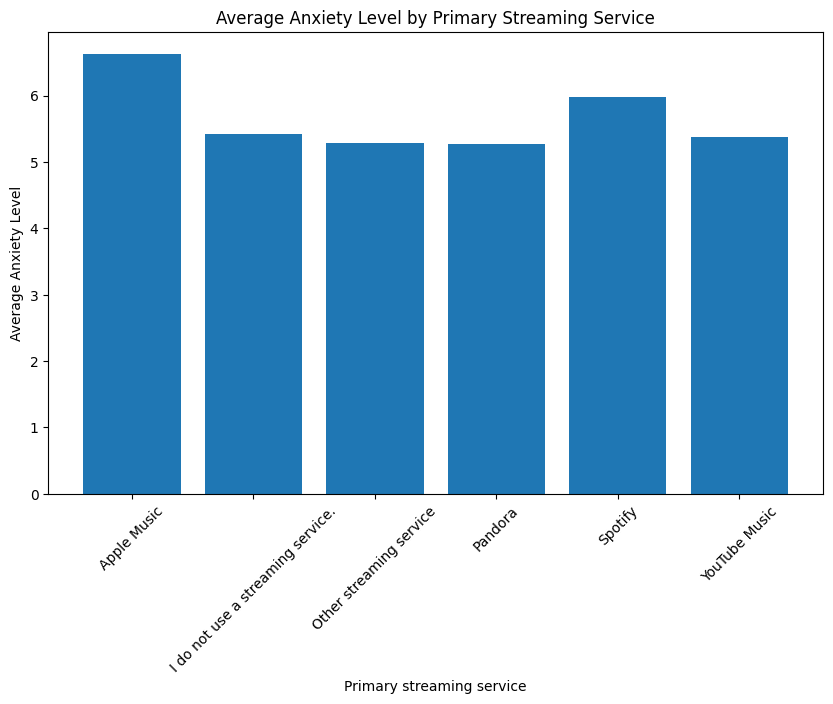

ModelError: Prediction failed for an unknown reason. It might have run out of memory? (exitcode -9)

In [71]:
agent.invoke("Buatkan bar chart untuk membandingkan rata-rata 'Anxiety' untuk setiap 'Primary streaming service'. Gunakan matplotlib.")

###  **Penjelasan Output (Grafik Bar):**

Grafik menampilkan rata-rata tingkat kecemasan (`Anxiety`) responden berdasarkan layanan streaming utama mereka. Berikut adalah beberapa insight dari grafik tersebut:

| Layanan Streaming                | Rata-rata Anxiety                    |
| -------------------------------- | ------------------------------------ |
| **Apple Music**                  | **Tertinggi** (sekitar 6.7)          |
| Spotify                          | Kedua tertinggi (sekitar 6.0)        |
| YouTube Music                    | Lebih rendah dari Spotify            |
| I do not use a streaming service | Cenderung lebih rendah (sekitar 5.4) |
| Pandora                          | Sekitar 5.3                          |
| Other streaming service          | Sekitar 5.3                          |

 **Insight**:

* Pengguna **Apple Music** memiliki rata-rata kecemasan tertinggi.
* Pengguna yang **tidak menggunakan layanan streaming** cenderung memiliki tingkat kecemasan yang **lebih rendah** dibanding pengguna platform musik digital.
* Ini bisa menjadi sinyal awal bahwa **jenis platform yang digunakan atau intensitas penggunaannya** dapat berhubungan dengan kondisi psikologis, namun perlu analisis lanjutan untuk memastikan sebab-akibat.


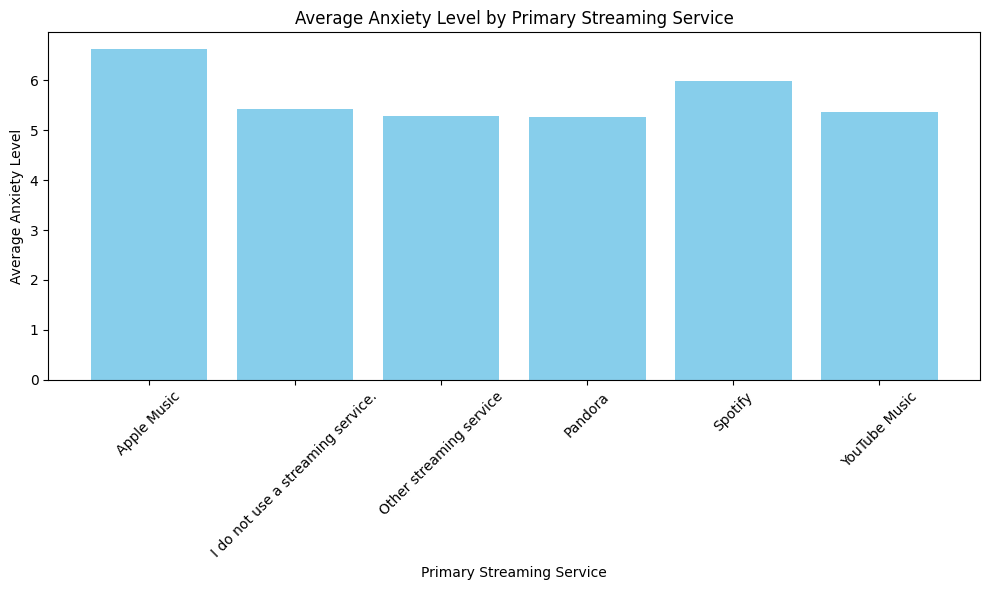

In [73]:
import matplotlib.pyplot as plt

df_clean = data[['Primary streaming service', 'Anxiety']].dropna()

grouped = df_clean.groupby('Primary streaming service')['Anxiety'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(grouped['Primary streaming service'], grouped['Anxiety'], color='skyblue')
plt.xlabel('Primary Streaming Service')
plt.ylabel('Average Anxiety Level')
plt.title('Average Anxiety Level by Primary Streaming Service')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Penjelasan Project

###  **Tujuan Project**

Project ini bertujuan untuk mengeksplorasi **pengaruh kebiasaan mendengarkan musik**—termasuk jenis layanan streaming, lama waktu mendengarkan, serta kebiasaan bermain alat musik—terhadap **tingkat kecemasan (anxiety)** individu. Data yang digunakan berasal dari survei yang memuat variabel psikologis, kebiasaan musik, dan preferensi layanan streaming.

---

###  **Langkah-langkah Analisis**

1. **Praproses dan Tinjauan Awal Dataset**

   * Dataset berisi 736 baris dan 33 kolom, termasuk fitur-fitur seperti `Anxiety`, `Music effects`, `Hours per day`, `Primary streaming service`, dan lainnya.
   * Kolom target untuk analisis utama adalah `Anxiety`.

2. **Analisis Statistik Deskriptif**

   * Rata-rata waktu mendengarkan musik adalah sekitar **3.57 jam per hari**.
   * Rata-rata tingkat kecemasan responden adalah **5.85** dari skala yang tidak dijelaskan (kemungkinan 1–10).

3. **Perbandingan Berdasarkan Variabel Khusus**

   * Responden yang **bermain alat musik** memiliki tingkat kecemasan **sedikit lebih tinggi** dibanding yang tidak (5.95 vs 5.79).
   * Pengguna **Spotify** adalah yang terbanyak (sekitar 60% dari responden).

4. **Visualisasi Rata-rata Tingkat Kecemasan Berdasarkan Layanan Streaming**

   * Dengan membuat bar chart, diketahui bahwa pengguna **Apple Music** memiliki rata-rata kecemasan tertinggi (\~6.7).
   * Responden yang **tidak menggunakan layanan streaming** memiliki tingkat kecemasan lebih rendah dibanding rata-rata.

---

##  Kesimpulan

Berdasarkan eksplorasi data yang dilakukan, diperoleh beberapa temuan penting:

* **Preferensi layanan streaming** tampaknya berkorelasi dengan tingkat kecemasan. Pengguna Apple Music menunjukkan tingkat kecemasan yang lebih tinggi dibandingkan pengguna layanan lainnya.
* Individu yang **tidak menggunakan layanan streaming** cenderung memiliki **tingkat kecemasan lebih rendah**, meskipun ini bukan kesimpulan kausal.
* Bermain alat musik **tidak secara signifikan mengurangi kecemasan**, bahkan justru ditemukan sedikit lebih tinggi rata-ratanya.
* Waktu mendengarkan musik yang tinggi (rata-rata 3.5 jam) menandakan pentingnya musik dalam keseharian responden, namun keterkaitannya langsung terhadap kecemasan perlu analisis lebih lanjut.
